# Datos no estructurados

Los datos no estructurados son aquellos datos que no tienen una organización a priori y cuya estructura no es inmediatamente obvia. Este tipo de datos representan un mayor reto para ser procesados, pues al no contar con una organización y caracterización previas, pueden presentar variaciones (de tamaño, de longitud, etc.) y suelen ser más difíciles de procesar por un sistema de aprendizaje.

Algunos datos no estructurados comúnes son los siguientes:

1. Imágenes
2. Texto
3. Gráficas relacionales

## Imágenes

Las imágenes son representadas como matrices de píxeles. En el caso más sencillo, un píxel puede ser un sólo valor numérico, por lo que la imágen podrá representarse en una matriz de tamaño $H \times W$, donde $H$ es la altura en píxeles de la imágen, y $W$ su anchura. Un ejemplo lo proporciona el conjunto de datos MNIST, que cuenta con imágenes de dígitos escritos a mano:

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

#Cargar el dataset
data = load_digits()
#Imágenes
x = data.data.reshape(1797,8,8)
#Clases (dígitos) de las imágenes
y = data.target

print(x[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Los códigos numéricos de la matriz representan las saturación de cada píxel en una escala de grises. Así el valor 0 representa el blanco, y los valores más altos representan los colores más oscuros. De tal forma, que podemos visualizar la imágen con respecto a los valores de la matriz.

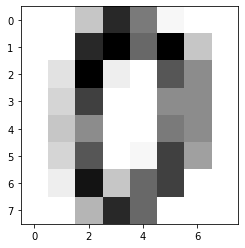

In [2]:
#Visualización de la imagen
plt.imshow(x[0], cmap='Greys')
plt.show()

Sin embargo, los píxeles no suelen representarse sólo con un valor numérico, pues esto daría imágenes sólo en escala de grises. Es común usar el formato RGB (Red-Green-Blue) para representar los píxeles de una imagen. El RGB representa cada píxel como un vector 3-dimensional, donde cada entrada representa la cantidad de color rojo, verde o azul que contiene ese píxel. De tal forma, que se pueden obtener diferentes colores para representar imágenes más elaboradas.

Asimismo, se pueden representar imágenes en formato RGB-$\alpha$, donde se agrega un valor extra $\alpha$ que representa la transparencia del píxel. En este caso, entonces, cada píxel será un vector 4-dimensional.

De esta forma, las imágenes se representarán por tensores de rango 3 con tamaño $H\times W \times C$, donde $H$ y $W$ son la altura y anchura en píxeles, respectivamente, y $C$ es el número de canales (RGB o RGB-$\alpha$).

[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ...
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ...

 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ...
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ...
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ...
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]
(427, 640, 3)


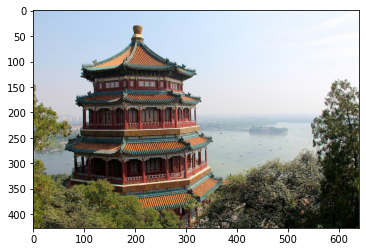

In [3]:
from sklearn.datasets import load_sample_images

#Carga imágenes RGB
imgs = load_sample_images().images

#Tensor de la imagen
print(imgs[0])
#Tamaño de la imagen
print(imgs[0].shape)

#Visualización de la imagen
plt.imshow(imgs[0])
plt.show()

Las imágenes también se pueden cargar desde almacenamiento local, usando la función <tt>image.imread()</tt> de la librería <tt>matplotlib</tt>. El tamaño del tensor dependerá del tipo de imágen que carguemos.

(1600, 900, 3)


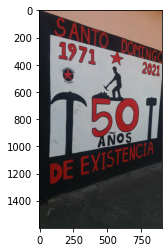

In [4]:
from matplotlib import image

#Carga imagen desde almacenamiento local
img = image.imread('imagen.jpg')
#Tamaño de la imagen
print(img.shape)

#Visualización
plt.imshow(img)
plt.show()

#### Flattening

El flattening permite transformar una imagen (o cualquier tensor) en un vector. Así, un tensor $T$ en $\mathbb{R}^{H \times W \times C}$, puede aplanarse en un vector de tamaño $\mathbb{R}^{H \cdot W \cdot C}$. Para esto, podemos usar la opción de <tt>reshape</tt> presente tanto en numpy como en PyTorch.

In [5]:
#Tamaño de la imagen
H, W = x[0].shape

print('Tamaño original: {}x{}'.format(H,W))
print('Flattening: {} con tamaño {}'.format(x[0].reshape(H*W), x[0].reshape(H*W).shape))

Tamaño original: 8x8
Flattening: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] con tamaño (64,)


El flattening permite procesar las imágenes con un algoritmo de aprendizaje. Por ejemplo, con un perceptrón multicapa o algún otro método que tome vectores como entrada. Sin embargo, procesar así las imágenes suele perder información, pues si la imagen es trasladada o rotada, los vectores resultantes del flattening serían diferentes a pesar de representar el mismo objeto. Por tanto, se han propuesto alternativas, como redes convolucionales.

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Aplanamiento del dataset
x_flat = x.reshape(len(x), H*W)
print('Tamaño con flattening: {}'.format(x_flat.shape))
#Separación en entrenamiento y evaluación
x_train, x_test, y_train, y_test = train_test_split(x_flat, y, test_size=0.3)

#Entrenamiento de un modelo de perceptrón
model = Perceptron(eta0=0.01)
model.fit(x_train, y_train)

#Evaluación del modelo
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)

print(report)

Tamaño con flattening: (1797, 64)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      0.93      0.93        46
           2       0.98      0.98      0.98        49
           3       0.96      0.92      0.94        59
           4       1.00      0.97      0.98        58
           5       0.96      0.88      0.92        57
           6       0.96      1.00      0.98        53
           7       0.98      0.91      0.94        54
           8       0.90      0.85      0.88        55
           9       0.78      0.98      0.87        59

    accuracy                           0.94       540
   macro avg       0.95      0.94      0.94       540
weighted avg       0.95      0.94      0.94       540



## Datos textuales

Otro tipo de dato no estructurado común son los datos en formato de texto. El caso del texto es más complejos que las imágenes, pues no se encuentran en un formato tensorial de principio. Se trata de cadenas de símbolos. Una cadena de símbolos puede tener la extensión de una palabra, una oración o un texto completo. Por tanto, se deben elegir cuáles son las unidades que se buscan representar. A estas unidades se les llama <b>tokens</b>. En la práctica se suelen usar tokenizadores sofisticados que encuentran sub-palabras (subwords) que son cadenas que idelamente tienen un significado dentro del lenguaje.

Si bien las palabras como espacios entre blancos no es la forma más eficiente de representar las palabras, es una forma sencilla para observar cómo se pueden representar los datos textuales en formato tensorial. En lo que sigue seguimos los siguientes pasos:

* Definimos un vocabulario que contenga los tokens (palabras) y que les asigne un valor numérico.
* Reemplazamos los datos textuales por arreglos de números.

In [7]:
from collections import defaultdict, Counter
import torch
import torch.nn as nn

#Funcion que crea un vocabulario de palabras con un indice numerico
def vocab():
    vocab = defaultdict()
    vocab.default_factory = lambda: len(vocab)
    return vocab    

#Funcion que pasa la cadena de simbolos a una secuencia con indices numericos
def text2index(corpus, vocab):
    for doc in corpus:
        yield torch.tensor([vocab[w] for w in doc.split()+['EOS']], dtype=torch.long)

Para los modelos de aprendizaje resulta más fácil trabajar con datos numéricos, por lo que los datos de texto, los tokens, se sustituyen por índices numéricos en las cadenas en que estos tokens aparecen. Los índices asignados son arbitrarios, y sólo basta llevar un registro, el vocabulario, de qué índice representa qué palabra.

In [8]:
#Textos
text_data = ['el perro come un hueso', 'un muchacho jugaba', 'el muchacho saltaba la cuerda',
             'un perro come croquetas', 'el perro come', 'el gato come croquetas', 'un gato come']

#Creación del vocabulario
voc = vocab()
voc['EOS'] = 0
#Sustitución de texto por índices
data = list(text2index(text_data, voc))

print(voc)
print(data[0])

defaultdict(<function vocab.<locals>.<lambda> at 0x7f4fd8132af0>, {'EOS': 0, 'el': 1, 'perro': 2, 'come': 3, 'un': 4, 'hueso': 5, 'muchacho': 6, 'jugaba': 7, 'saltaba': 8, 'la': 9, 'cuerda': 10, 'croquetas': 11, 'gato': 12})
tensor([1, 2, 3, 4, 5, 0])


En el aprendizaje profundo es común representar las textos mediante encajes o embeddings, que son representaciones vectoriales de cada token en un texto. En PyTorch y Tensorflow ya existen las capas de <tt>Embedding</tt> que, a partir de los índices numéricos que hemos asignado, representan los vectores.

Aquí vemos el uso de la capa <tt>Embedding</tt> en PyTorch. Primero definirmos el tamaño del vocabulario $n$; es decir, el número de tokens que deseamos representar. Así como las dimensiones en las que queremos que los tokens se representen. En este caso, para visualizar más adecuadamente usamos 2 dimensiones.

De esta forma, la capa de embedding toma un dato textual, por ejemplo una oración, y regresa una matriz donde cada renglón es la representación vectorial de un token en el texto.

In [9]:
#Longitud del vocabulario
n = len(voc)
#Capa de embedding de dimensión 2
emb = nn.Embedding(n, 2)

print(emb(data[0]))

tensor([[ 0.7414,  1.2393],
        [-0.3499,  0.3628],
        [-1.9550,  0.8088],
        [-1.4627,  0.8945],
        [ 0.0432, -0.1109],
        [-0.6568,  0.1318]], grad_fn=<EmbeddingBackward>)


En principio, los embeddings son arbitrarios, las asignaciones se hacen de manera aleatoria. Por lo que no tienen mucho sentido los vectores de éstos. Como podemos ver a continuación, estos vectores no guardan relaciones que podamos interpretar dentro del lenguaje natural.

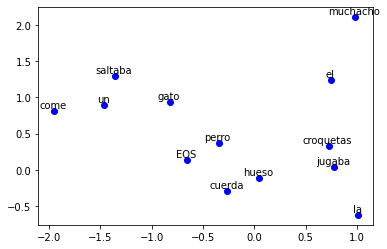

In [10]:
#Funcion para plotear los datos con labels
def plot_words(Z,ids):    
    #Plotea con la marcas (marker) y el color indicado (c)
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label, xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()
    
plot_words(emb.weight.detach().numpy(), voc.keys())

Sin embargo, el uso de las capas de embedding se integra dentro de arquitecturas neuronales más complejas, orientadas a resolver problemas específicos. De tal forma, que la red neuronal aprende a resolver el problema mientras aprende las representaciones vectoriales de los tokens en el texto. Según el problema los embeddings resultantes pueden variar. En la práctica se suelen usar embeddings pre-entrenados; es decir, representaciones vectoriales de tokens que son entrenados para tareas generales, de tal forma que pueden adaptarse de manera sencilla a tareas específicas. Una de estas tareas generales es la predicción del siguiente token, que de hecho es la tarea que presentamos a continuación.

In [11]:
from tqdm import tqdm

#Arquitectura de la red
out = nn.Sequential(nn.Linear(2, len(voc)+1), nn.Softmax(1))
risk = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(emb.parameters()) + list(out.parameters()), lr=0.01)
#Entrenamiento
for t in tqdm(range(0, 100)):
    for x in data:
        y_pred = out(emb(x[:-1]))
        optimizer.zero_grad()
        loss = risk(y_pred, x[1:])
        loss.backward()
        optimizer.step()

100%|██████████| 100/100 [00:00<00:00, 281.04it/s]


Cuando hemos entrenado los embeddings para una tarea, las representaciones que se obtienen adquieren mayor sentido. En general podemos ver que tokens que guardan relaciones de uso (significado) aparecen más cercanos entre sí, que aquellos tokens que no.

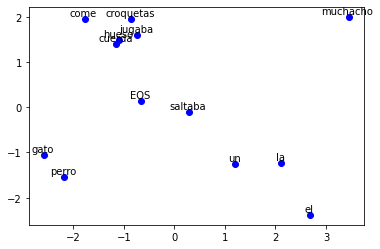

In [12]:
plot_words(emb.weight.detach().numpy(), voc.keys())

## Grafos relacionales

Las relaciones entre diferentes objetos en un sistema relacional se pueden representar adecuadamente por medio de grafos. Por ejemplo, interacción en redes sociales, estructuras químicas, etc. Los grafos son una herramienta poderosa para representar estos datos. Sin embargo, los grafos entran dentro de lo que consideramos datos no estructurados, pues no existe una estandarización entre las relaciones que se pueden dar y, por tanto, no podemos decir que están organizados bajo criterios específicos.

Los grafos pueden ser pesados, mostrando un valor numérico por cada relación. Dentro del aprendizaje automático y el aprendizaje profundo, los grafos tienen un papel sumamente importante.

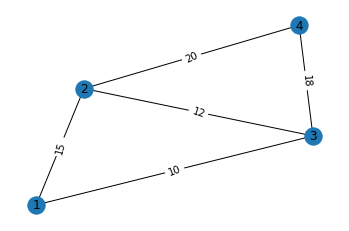

In [13]:
import networkx as nx

#Creación de grafo pesado
G = nx.Graph()
G.add_edge(1, 2, weight=15)
G.add_edge(1, 3, weight=10)
G.add_edge(3, 4, weight=18)
G.add_edge(2, 4, weight=20)
G.add_edge(2, 3, weight=12)

#Visualización del grafo
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw(G, pos, with_labels=True)

Los grafos pueden representarse también por medio de tensores. En particular, todo grafo tiene una matriz de adyacencia asociada, que representa las conexiones de los elementos en los grafos. En el aprendizaje profundo, tmabién es común que los nodos tengan asociado un vector que los represente. Esto es común en redes neuronales para grafos, que además de procesar estas representaciones vectoriales de los nodos, utilizan la información de la amtriz de adyacencia para resolver tareas.

In [14]:
#Matriz de adyacencia
A = nx.to_numpy_array(G)

print(A)

[[ 0. 15. 10.  0.]
 [15.  0. 12. 20.]
 [10. 12.  0. 18.]
 [ 0. 20. 18.  0.]]
